# Initial Race EDA check

This is a file that show case checking different type of race bias showing in the dataset.

Note that the code itself is not well documented, the results are however, accurate

In [ ]:
#@title Google Collab only
import sys
sys.path.insert(0,'/content')

## Importing dependency

In [ ]:
!pip install cpi

In [ ]:
import coupon
import other
import ticket
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip -o /content/drive/MyDrive/UCSD/DSC180B/Airline\ Data/Coupon/Origin_and_Destination_Survey_DB1BCoupon_2019_1.zip
!unzip -o /content/drive/MyDrive/UCSD/DSC180B/Airline\ Data/Ticket/Origin_and_Destination_Survey_DB1BTicket_2019_1.zip

Archive:  /content/drive/MyDrive/UCSD/DSC180B/Airline Data/Coupon/Origin_and_Destination_Survey_DB1BCoupon_2019_1.zip
  inflating: Origin_and_Destination_Survey_DB1BCoupon_2019_1.csv  
  inflating: readme.html             
Archive:  /content/drive/MyDrive/UCSD/DSC180B/Airline Data/Ticket/Origin_and_Destination_Survey_DB1BTicket_2019_1.zip
  inflating: Origin_and_Destination_Survey_DB1BTicket_2019_1.csv  
  inflating: readme.html             


In [ ]:
coupon_df = pd.read_csv("/content/Origin_and_Destination_Survey_DB1BCoupon_2019_1.csv")
ticket_df = pd.read_csv("/content/Origin_and_Destination_Survey_DB1BTicket_2019_1.csv")

In [ ]:
combined = other.gen_ticket_coupon(ticket_df, coupon_df)

In [ ]:
combined_filtered_FPM = ticket.filter_ticket_df_outliers_FPM(combined)
filter_combined = ticket.filter_ticket_df_outliers_Itin(combined_filtered_FPM)

Grabbing Race Data

In [ ]:
race_city_code = pd.read_csv(
    "/content/drive/MyDrive/UCSD/DSC180B/Airline Data/race_city_id.csv")

In [ ]:
race_city_code.head()

,Unnamed: 0,Code,metro,white,non-white
0,0,30135,"Allentown, PA",0.693896,0.306104
1,1,30136,"Abilene, TX",0.624967,0.375033
2,2,30140,"Albuquerque, NM",0.380995,0.619005
3,3,30146,"Albany, GA",0.409644,0.590356
4,4,30155,"Waco, TX",0.534684,0.465316


Modified Income fucntion to meet race

In [ ]:
# This shows the data statistics of city areas that has 
# median income in the bottom 25 percentile
def bottom_25_data(combined, census_df):
  bot_25_median = census_df["non-white"].quantile(.25)
  bottom_25_origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                "MilesFlown", "SeqNum"]].merge(
    census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
    left_on = "OriginCityMarketID", right_on="Code")
  bottom_25_dest = combined[["FarePerMile", "RPCarrier", "DestCityMarketID", 
                             "MilesFlown", "SeqNum"]].merge(
    census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
    left_on = "DestCityMarketID", right_on="Code")
  print("Flights originate city areas that has non-white population in the bottom 25 percentile")
  print("Mean of FarePerMile : ", bottom_25_origins.FarePerMile.mean())
  print("Mean of MilesFlown : ", bottom_25_origins.MilesFlown.mean())
  print("Mean of Average Segments:", bottom_25_origins.SeqNum.mean())
  print("FarePerMile by carrier:")
  bottom_25_origins[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
  plt.show()
  print("FarePerMile Distribution:")
  bottom_25_origins.FarePerMile.hist()
  plt.show()
  print("Flights destination is city areas that has non-white population in the bottom 25 percentile")
  print("Mean of FarePerMile : ", bottom_25_dest.FarePerMile.mean())
  print("Mean of MilesFlown : ", bottom_25_dest.MilesFlown.mean())
  print("Mean of Average Segments:", bottom_25_dest.SeqNum.mean())
  print("FarePerMile by carrier:")
  bottom_25_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
  plt.show()
  print("FarePerMile Distribution:")
  bottom_25_dest.FarePerMile.hist()
  plt.show()

Flights originate city areas that has non-white population in the bottom 25 percentile
Mean of FarePerMile :  0.243269340608236
Mean of MilesFlown :  2164.5521546331656
Mean of Average Segments: 3.00642558180663
FarePerMile by carrier:


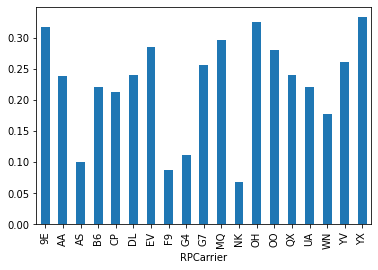

FarePerMile Distribution:


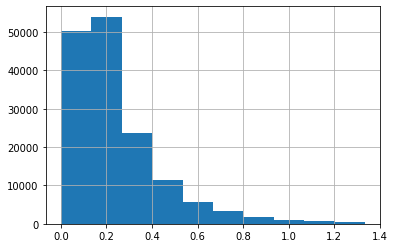

Flights destination is city areas that has non-white population in the bottom 25 percentile
Mean of FarePerMile :  0.24537950092133606
Mean of MilesFlown :  2155.2805792738313
Mean of Average Segments: 2.9938296436635436
FarePerMile by carrier:


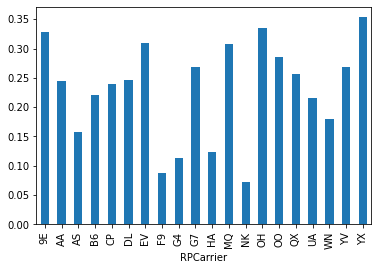

FarePerMile Distribution:


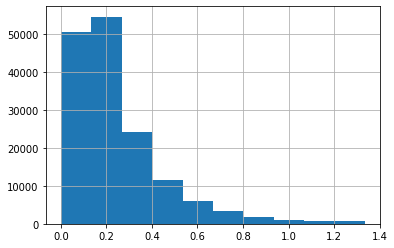

In [ ]:
bottom_25_data(filter_combined, race_city_code)

In [ ]:
# This shows the data statistics of city areas that has 
# median income in the upper 25 percentile
def upper_25_data(combined, census_df):
    bot_25_median = census_df["non-white"].quantile(.75)
    upper_25_origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                  "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] >= bot_25_median][["Code", "non-white"]], 
      left_on = "OriginCityMarketID", right_on="Code")
    upper_25_dest = combined[["FarePerMile", "RPCarrier", "DestCityMarketID", 
                               "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] >= bot_25_median][["Code", "non-white"]], 
      left_on = "DestCityMarketID", right_on="Code")
    print("Flights originate city areas that has median income in the upper 25 percentile")
    print("Mean of FarePerMile : ", upper_25_origins.FarePerMile.mean())
    print("Mean of MilesFlown : ", upper_25_origins.MilesFlown.mean())
    print("Mean of Average Segments:", upper_25_origins.SeqNum.mean())
    print("FarePerMile by carrier:")
    upper_25_origins[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    upper_25_origins.FarePerMile.hist()
    plt.show()
    print("Flights destination is city areas that has median income in the upper 25 percentile")
    print("Mean of FarePerMile : ", upper_25_dest.FarePerMile.mean())
    print("Mean of MilesFlown : ", upper_25_dest.MilesFlown.mean())
    print("Mean of Average Segments:", upper_25_dest.SeqNum.mean())
    print("FarePerMile by carrier:")
    upper_25_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    upper_25_dest.FarePerMile.hist()
    plt.show()


# This shows the flight statistics of city areas that has 
# with upper and lower 25th percentile as orgin and dest
# and vice-versa
def lower_and_upper_data(combined, census_df):
    bot_25_median = census_df["non-white"].quantile(.25)
    up_25_median = census_df["non-white"].quantile(.75)
    origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                  "DestCityMarketID", "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
      left_on = "OriginCityMarketID", right_on="Code")
    origin_dest = origins.merge(
      census_df[census_df["non-white"] >= up_25_median][["Code", "non-white"]], 
      left_on = "DestCityMarketID", right_on="Code")
    print("Flights originate bottom 25 to upper 25")
    print("Mean of FarePerMile : ", origin_dest.FarePerMile.mean())
    print("Mean of MilesFlown : ", origin_dest.MilesFlown.mean())
    print("Mean of Average Segments:", origin_dest.SeqNum.mean())
    print("FarePerMile by carrier:")
    origin_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    origin_dest.FarePerMile.hist()
    plt.show()
    origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                  "DestCityMarketID", "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] >= up_25_median][["Code", "non-white"]], 
      left_on = "OriginCityMarketID", right_on="Code")
    origin_dest = origins.merge(
      census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
      left_on = "DestCityMarketID", right_on="Code")
    print("Flights originate upper 25 to bottom 25")
    print("Mean of FarePerMile : ", origin_dest.FarePerMile.mean())
    print("Mean of MilesFlown : ", origin_dest.MilesFlown.mean())
    print("Mean of Average Segments:", origin_dest.SeqNum.mean())
    print("FarePerMile by carrier:")
    origin_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    origin_dest.FarePerMile.hist()
    plt.show()

# This shows the flight statistics of city areas that has 
# with upper25 as both orgin and dest
# and lower as both orgin and dest
def double_low_high(combined, census_df):
    bot_25_median = census_df["non-white"].quantile(.25)
    up_25_median = census_df["non-white"].quantile(.75)
    origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                  "DestCityMarketID", "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
      left_on = "OriginCityMarketID", right_on="Code")
    origin_dest = origins.merge(
      census_df[census_df["non-white"] <= bot_25_median][["Code", "non-white"]], 
      left_on = "DestCityMarketID", right_on="Code")
    print("Flights originate and destin for bottom 25")
    print("Mean of FarePerMile : ", origin_dest.FarePerMile.mean())
    print("Mean of MilesFlown : ", origin_dest.MilesFlown.mean())
    print("Mean of Average Segments:", origin_dest.SeqNum.mean())
    print("FarePerMile by carrier:")
    origin_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    origin_dest.FarePerMile.hist()
    plt.show()
    origins = combined[["FarePerMile", "RPCarrier", "OriginCityMarketID", 
                                  "DestCityMarketID", "MilesFlown", "SeqNum"]].merge(
      census_df[census_df["non-white"] >= up_25_median][["Code", "non-white"]], 
      left_on = "OriginCityMarketID", right_on="Code")
    origin_dest = origins.merge(
      census_df[census_df["non-white"] >= up_25_median][["Code", "non-white"]], 
      left_on = "DestCityMarketID", right_on="Code")
    print("Flights originate and destin for upper 25")
    print("Mean of FarePerMile : ", origin_dest.FarePerMile.mean())
    print("Mean of MilesFlown : ", origin_dest.MilesFlown.mean())
    print("Mean of Average Segments:", origin_dest.SeqNum.mean())
    print("FarePerMile by carrier:")
    origin_dest[["FarePerMile", "RPCarrier"]].groupby("RPCarrier").mean()["FarePerMile"].plot(kind="bar")
    plt.show()
    print("FarePerMile Distribution:")
    origin_dest.FarePerMile.hist()
    plt.show()


Flights originate city areas that has median income in the upper 25 percentile
Mean of FarePerMile :  0.2403994816862265
Mean of MilesFlown :  2118.628242010954
Mean of Average Segments: 2.3033098525214624
FarePerMile by carrier:


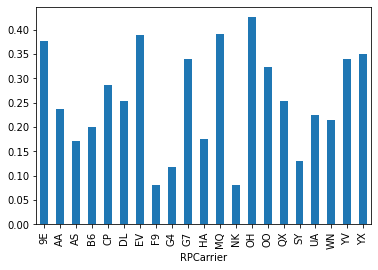

FarePerMile Distribution:


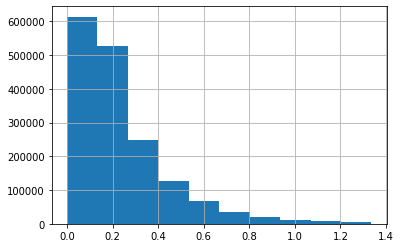

Flights destination is city areas that has median income in the upper 25 percentile
Mean of FarePerMile :  0.23885056614397282
Mean of MilesFlown :  2125.884939153599
Mean of Average Segments: 2.309587092086941
FarePerMile by carrier:


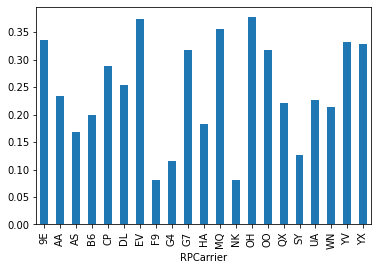

FarePerMile Distribution:


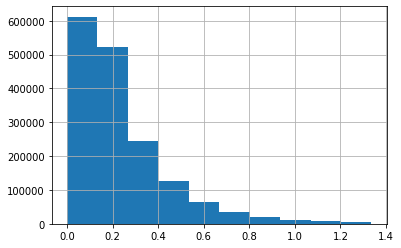

In [ ]:
upper_25_data(filter_combined, race_city_code)

Flights originate bottom 25 to upper 25
Mean of FarePerMile :  0.24640424189307625
Mean of MilesFlown :  1462.1580192813321
Mean of Average Segments: 1.8640666082383874
FarePerMile by carrier:


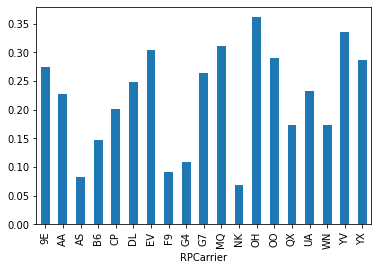

FarePerMile Distribution:


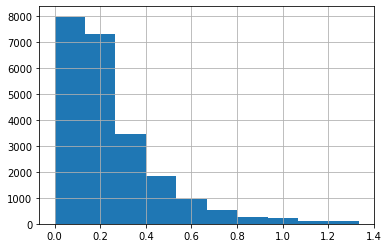

Flights originate upper 25 to bottom 25
Mean of FarePerMile :  0.25849439029491733
Mean of MilesFlown :  1445.1843965697553
Mean of Average Segments: 1.85199749006484
FarePerMile by carrier:


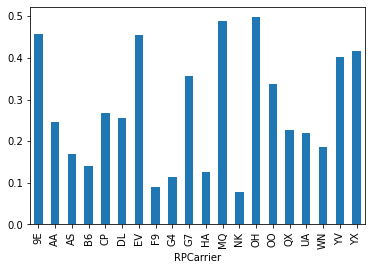

FarePerMile Distribution:


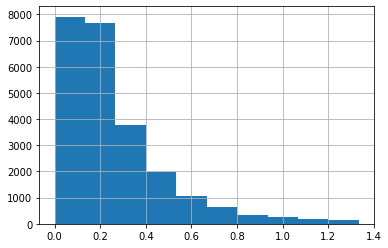

In [ ]:
lower_and_upper_data(filter_combined, race_city_code)

Flights originate and destin for bottom 25
Mean of FarePerMile :  0.23174142445317636
Mean of MilesFlown :  2527.268650042338
Mean of Average Segments: 3.517025507340139
FarePerMile by carrier:


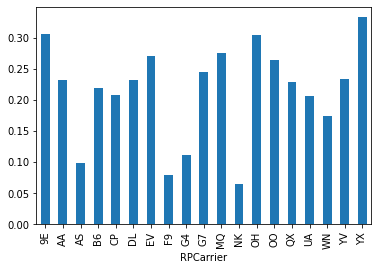

FarePerMile Distribution:


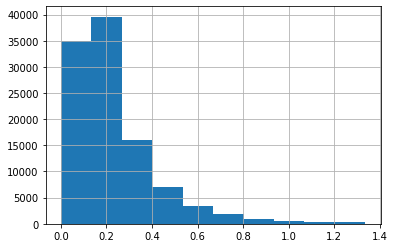

Flights originate and destin for upper 25
Mean of FarePerMile :  0.24041510817252562
Mean of MilesFlown :  2307.698645530361
Mean of Average Segments: 2.508143582638622
FarePerMile by carrier:


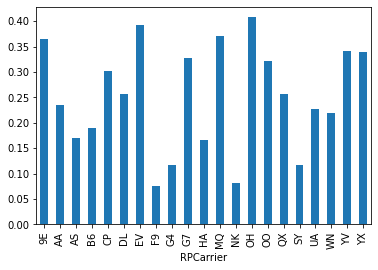

FarePerMile Distribution:


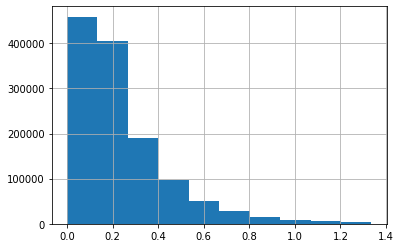

In [ ]:
double_low_high(filter_combined, race_city_code)